*Resolução de Problema de Programação Linear*

Clássico problema de rede de distribuição. 

Problemas que consideram múltiplas fontes, centros consumidores e locais intermediarios por onde os produtos simplesmente passam são denominados problemas de rede de distribuição. [Pesquisa Operacional na Tomada de Decisão]

Problema:  Definir a configuração de envio de automoveis das fabricas para os centros de distribuição ao menor custo possivel, levando em conta as restrições impostas pelo requisitante.

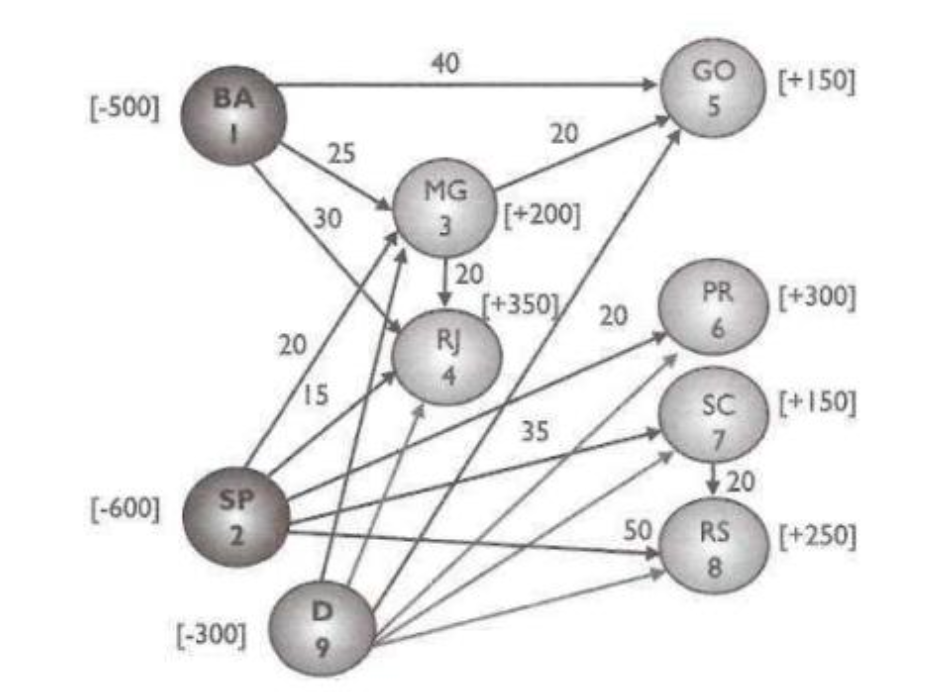

In [1]:
# intalando o framework Ortools da Google

!pip install ortools

In [25]:
# Importando solver e os demais pacotes necessarios

import ortools.linear_solver.pywraplp as otlp
import numpy as np

In [3]:
# chamando o solver escolhido para resolução do problema

solver = otlp.Solver('teste',otlp.Solver.GLOP_LINEAR_PROGRAMMING)

In [4]:
# definindo as variaveis

x_ba_mg = solver.NumVar(0,9999,'x13') # enviado de para
x_ba_rj = solver.NumVar(0,9999,'x14') # enviado de para
x_ba_go = solver.NumVar(0,9999,'x15') # enviado de para
x_sp_mg = solver.NumVar(0,9999,'x23') # enviado de para
x_sp_rj = solver.NumVar(0,9999,'x24') # enviado de para
x_sp_pr = solver.NumVar(0,9999,'x26') # enviado de para
x_sp_sc = solver.NumVar(0,9999,'x27') # enviado de para
x_sp_rs = solver.NumVar(0,9999,'x28') # enviado de para
x_mg_rj = solver.NumVar(0,9999,'x34') # enviado de para
x_mg_go = solver.NumVar(0,9999,'x35') # enviado de para
x_sc_rs = solver.NumVar(0,9999,'x78') # enviado de para
xd_mg = solver.NumVar(0,9999,'x93') # deixará de receber
xd_rj = solver.NumVar(0,9999,'x94') # deixará de receber
xd_go = solver.NumVar(0,9999,'x95') # deixará de receber
xd_pr = solver.NumVar(0,9999,'x96') # deixará de receber
xd_sc = solver.NumVar(0,9999,'x97') # deixará de receber
xd_rs = solver.NumVar(0,9999,'x98') # deixará de receber

In [5]:
# Criando as restrições do problema

solver.Add(-(x_ba_mg)-(x_ba_rj)-(x_ba_go) == -500) # nó 01
solver.Add(-(x_sp_mg)-(x_sp_rj)-(x_sp_pr)-(x_sp_sc)-(x_sp_rs) == -600) # nó 02
solver.Add((x_ba_mg)+(x_sp_mg)+(xd_mg)-(x_mg_rj )-(x_mg_go) == 200) # nó 03
solver.Add((x_ba_rj)+(x_sp_rj)+(x_mg_rj)+(xd_rj) == 350) # nó 04
solver.Add((x_ba_go)+(x_mg_go)+(xd_go) == 150) # nó 05
solver.Add((x_sp_pr)+(xd_pr) == 300) # nó 06
solver.Add((x_sp_sc)+(xd_sc)+(x_sc_rs) == 150) # nó 07
solver.Add((x_sp_rs)+(x_sc_rs)+(xd_rs) == 250) # nó 08

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x000001EE8F7E9C90> >

In [18]:
# Definição da Função Objetivo

solver.Minimize(25*(x_ba_mg)+30*(x_ba_rj)+40*(x_ba_go)+20*(x_sp_mg)+15*(x_sp_rj)+20*(x_sp_pr)+
                35*(x_sp_sc)+50*(x_sp_rs)+20*(x_mg_rj)+20*(x_mg_go)+ 20 *(x_sc_rs))


In [19]:
# Chamando o solver para resolver o problema

results = solver.Solve()

In [29]:
# Avaliando se o Solver encontrou o Otimo Global

if results == otlp.Solver.OPTIMAL:
    print('Resultado Otimo encontrado!')
else:
    print('Otimo Global não encontrado!')

print('Da Bahia para Minas: ', x_ba_mg.solution_value())
print('Da Bahia para o Rio: ', x_ba_rj.solution_value())
print('Da Bahia para Goias: ', x_ba_go.solution_value())
print('De São Paulo para Minas: ', x_sp_mg.solution_value())
print('De São Paulo para o Rio: ', x_sp_rj.solution_value())
print('De São Paulo para Paraná: ', x_sp_pr.solution_value())
print('De São Paulo para Santa Catarina: ', x_sp_sc.solution_value())
print('De São Paulo para Rio Grande do Sul: ', x_sp_rs.solution_value())
print('De Minas para o Rio', x_mg_rj.solution_value())
print('De Minas para Goias: ', x_mg_go.solution_value())
print('De Santa Catarina para o Rio Grande do Sul: ', x_sc_rs.solution_value())
print('Distribuidor de Minas deixa de receber: ', xd_mg.solution_value())
print('Distribuidor do Rio deixa de receber: ', xd_rj.solution_value())
print('Distribuidor de Goias deixa de receber: ', xd_go.solution_value())
print('Distribuidor do Paraná deixa de receber: ', xd_pr.solution_value())
print('Distribuidor de Santa Catarina deixa de receber: ', xd_sc.solution_value())
print('Distribuidor do Rio Grande do Sul deixa de receber: ', xd_rs.solution_value())
print('Custo Total de: R$', solver.Objective().Value())

Resultado Otimo encontrado!
Da Bahia para Minas:  200.0
Da Bahia para o Rio:  150.00000000000003
Da Bahia para Goias:  150.0
De São Paulo para Minas:  0.0
De São Paulo para o Rio:  200.0
De São Paulo para Paraná:  300.0
De São Paulo para Santa Catarina:  100.00000000000001
De São Paulo para Rio Grande do Sul:  0.0
De Minas para o Rio 0.0
De Minas para Goias:  0.0
De Santa Catarina para o Rio Grande do Sul:  0.0
Distribuidor de Minas deixa de receber:  0.0
Distribuidor do Rio deixa de receber:  0.0
Distribuidor de Goias deixa de receber:  0.0
Distribuidor do Paraná deixa de receber:  0.0
Distribuidor de Santa Catarina deixa de receber:  49.999999999999986
Distribuidor do Rio Grande do Sul deixa de receber:  250.0
Custo Total de: R$ 28000.0
